### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

### Loading the dataframe

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Preprocess the data

In [3]:
df.shape

(13320, 9)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.isnull().sum().sum()

6201

In [7]:
## There are 6201 values missing out of which most missing values come from the society column

In [8]:
len(df.society.unique())

2689

In [9]:
# Seeing how this column affects the price column

new_df=(df.groupby('society').sum())
new_df

,bath,balcony,price
society,,,
3Codeli,4.0,4.0,117.00
7 ise P,2.0,1.0,50.00
A idse,4.0,4.0,100.00
A rtsai,2.0,1.0,73.00
ACersd,2.0,2.0,115.00
...,...,...,...
Zonce E,7.0,4.0,197.50
Zostaa,6.0,3.0,186.00
i1ncyRe,2.0,2.0,50.00


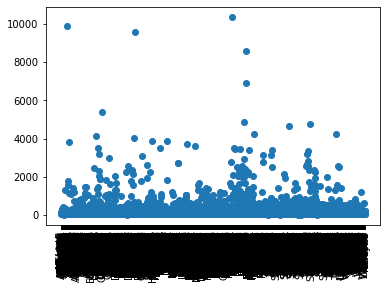

In [10]:
plt.xticks(rotation=90)

plt.scatter(x=new_df.index,y=new_df.price)

In [11]:
## We see that there seems to be no linear relation also due to high amount of data being absent we can drop this column

In [12]:
## now we see what kind of relation teh area type holds
len(df.area_type.unique())
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

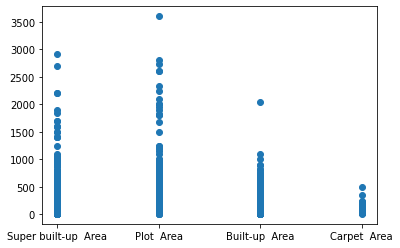

In [13]:
plt.scatter(df.area_type,df.price)

In [14]:
## the areatype does not keep the range of house in a particular region and hence seems not to have affect ojn the house price,so we can drop it

In [15]:
## Seeing the effect of availability
df.availability.unique()
df.availability.value_counts()
##Assuming availabity will not affect the price to great extent(Common knowledge) We drop it.

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [16]:
## dropiing the columns
house=df.drop(['area_type','balcony','availability','society'],axis='columns')
house.head()
house.shape

(13320, 5)

In [17]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
house.shape

(13320, 5)

In [19]:
house=house.dropna()
house.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
house.shape

(13246, 5)

In [21]:
type(house)

pandas.core.frame.DataFrame

### We do feature Engineering

In [22]:
house['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [23]:
len(house)

13246

In [24]:
house['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [26]:
### here we assume 2BHK and 2 bedroom represent same thing

In [27]:
house=house.replace({
    'size': '[A-Za-z]'
},'',regex=True)

house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [28]:
type(house['size'][0])

str

In [29]:
house['size'] = house['size'].astype(int)

In [30]:
house['size'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [31]:
house[house['size']==43]

,location,size,total_sqft,bath,price
4684,Munnekollal,43,2400,40.0,660.0


In [32]:
house.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [33]:
## We try to convert all the range value and the values not in proper form to a form that will be needed by our model

#we define a fucntion that will check and confirm if in the given column all values are valid floats

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [34]:
## now we convert the range values to valid numbers

def convert(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None ## if it is neighter in range form now a single number ex(2100 ft or smehting)
    ## we could also apply fucntions to convert it to required dimension but in this case we just return none

In [35]:
## Niw we apply this funciton to our DF

(house[~(house.total_sqft.apply(is_float))])

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [36]:
df1=house.copy()
df1['total_sqft']=df1.total_sqft.apply(convert)
df1 = df1[df1.total_sqft.notnull()] ## we drop all those points which had null in this column
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [37]:
df1.loc[30]

location      Yelahanka
size                  4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [38]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## We apply some feature engineering

In [39]:
df1['Price_per_sqft']=(df1['price']*100000)/df1['total_sqft'] ## We have here price in lakhs
df1.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [40]:
## We see location is categorical hence we would need to convert it into numerical
## Lets see the number of unique values

df1.location.unique()
len(df1.location.unique())

1298

In [41]:
## This is high dimensionalityy problem or dimensionality curse.. we need to reduce this so that when we apply one hotencoding we do ot get too many columns

In [42]:
df1.location=df1.location.apply(lambda x: x.strip()) ## We use this to strip extra spaces so that redundancy does not arise
len(df1.location.unique())

1287

In [43]:
## We group by location and then count the number of rows arriving in every location value
Location_stats=(df1.groupby('location')['location'].agg('count')).sort_values(ascending=False)
Location_stats

## This helps us to know how many data points having a particular location are present
## So based on this we can make an other column that has all the locations whose datapoints are very less


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [44]:
## lets take up an threshold such the if any location that has less than equal to 10 datapoints that location can be grouped under 'other' location
len(Location_stats[Location_stats<=10])

1047

In [45]:
## Thus we have 1047 locations with datapoints less than or equal to 10

Locs_sparse=Location_stats[Location_stats<=10] ## this contains all those locations
Locs_sparse

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [46]:
len(df1.location.unique())

1287

In [47]:
## So originally we have 1287 unique values but we can group some to reduce dimentionality based on above discussion

df1.location=df1.location.apply(lambda x: 'other' if x in Locs_sparse else x )
df1.head(10)

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [48]:
len(df1.location.unique())

241

In [49]:
## Now we just have 241 unique locations,thus applying tokanization can be done withput dramatically increasing the number of columns

### Outlier Detection

In [50]:
df1.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [51]:
df1.rename(columns={'size' : 'no_of_bhk'},inplace =True)

In [52]:
df1.head()

,location,no_of_bhk,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [53]:
## It is common knowlege in real estate that the area of a room is aroud 300sqft 
#and hence any cases that are very anamolous to this can be errors/outliars and 
#hence must be removed in order for our dataset to make predictons correctly

#We check
df1[df1.total_sqft/df1.no_of_bhk<300]

,location,no_of_bhk,total_sqft,bath,price,Price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [54]:
df1.shape

(13200, 6)

In [55]:
## We can drop these data, we create a new DF with the required specifications

df2=df1[~(df1.total_sqft/df1.no_of_bhk<300)]
df2.shape

(12456, 6)

In [56]:
lost=df1.shape[0]-df2.shape[0]
lost

744

In [57]:
df2.head()

,location,no_of_bhk,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [58]:
## Now we see Price_per_sqft column
df2.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [59]:
### There can be some datapoints ahving very small or large value for Price_per_sqft, ofcourse it depends on location so, for every location
#We filter out the values which are not within one standard deviation of that that locations mean

## fuction for the same

def remove_price_outlier(df):
    out_df=pd.DataFrame()
    for key, df_slice in df.groupby('location'):
        mean=np.mean(df_slice.Price_per_sqft)
        std=np.std(df_slice.Price_per_sqft)
        reduced_df= df_slice[(df_slice.Price_per_sqft> (mean-std)) & (df_slice.Price_per_sqft<=(mean+std) )] ## This line will have only those
        # rows that have their Price_per_sqft in the 1st standar deviation
        out_df=pd.concat([out_df,reduced_df],ignore_index=True)
    return out_df
    
    
    

In [60]:
df1.head()
df1.shape

(13200, 6)

In [61]:
df2=remove_price_outlier(df2)
df2.head()
df2.shape

(10242, 6)

In [62]:
### We want to see if for same location the property price of 2bhk is less than 3bhk

def scatter_plot(df,loc):
    bhk2=df[(df.location==loc) & (df.no_of_bhk==2)]
    bhk3=df[(df.location==loc) & (df.no_of_bhk==3)]
    
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',marker='+',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 BHK', marker='o',s=50)
    plt.xlabel('Total sqft area')
    plt.ylabel('Price in Lakh')
    plt.grid()
    plt.legend()
    plt.title(loc)

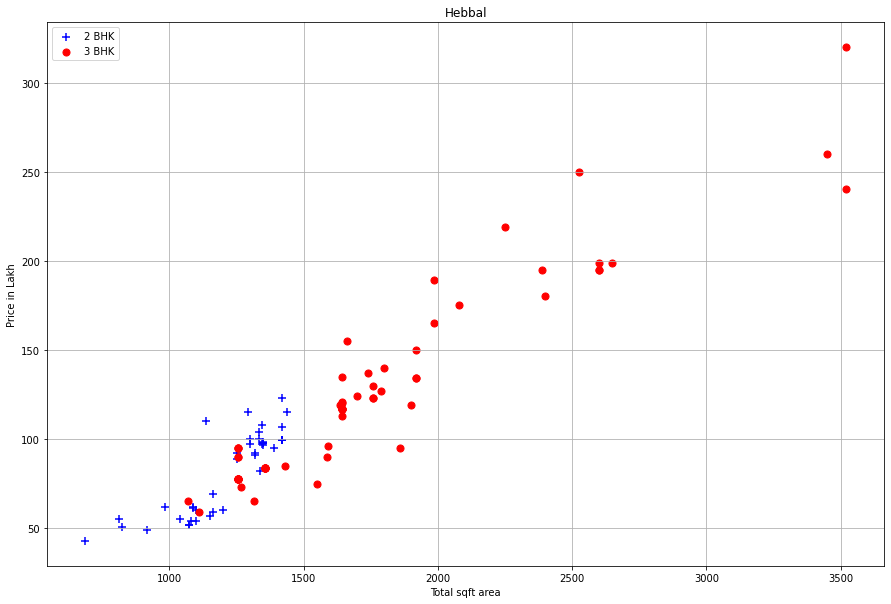

In [63]:
scatter_plot(df2,'Hebbal')

In [64]:
### now we will remove all those datapoints which have same location as some 
###datapoints of lower BHK but thier Price_per_sqft is lower than them

## Function for the same
def remove_bhk_outliers(df):
    excluded_indices = np.array([]) ## this array will contain  the outlier indices
    for location,location_df in df.groupby('location'):## This groups the given df based on location
        bhk_stats={} ## this dictionary will be nested dictionary
        for bhk,bhk_df in location_df.groupby('no_of_bhk'): ## for every location this groups the df based on bhk
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std' : np.std(bhk_df.Price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('no_of_bhk'):
            stats=bhk_stats.get(bhk-1) ## this will contain the dictionary of bhk-1 stats (we use .get because it returns none if index not present) but bhk[index] shows error in such case
            if stats and stats['count']>5:
                ## here we need to check stats as it can be none for 1st loop when bhk_stats.get(0)
                excluded_indices=np.append(excluded_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excluded_indices,axis='index') ## this drops all the rows that are in excluded_indices array


### This fucntion removes all those datapoints who have lower Price_per_sqft than the mean of the bhk less than itself and is in same location

In [65]:
df3=remove_bhk_outliers(df2)
df3.shape

(7317, 6)

In [66]:
df2.shape

(10242, 6)

In [67]:
df3.shape

(7317, 6)

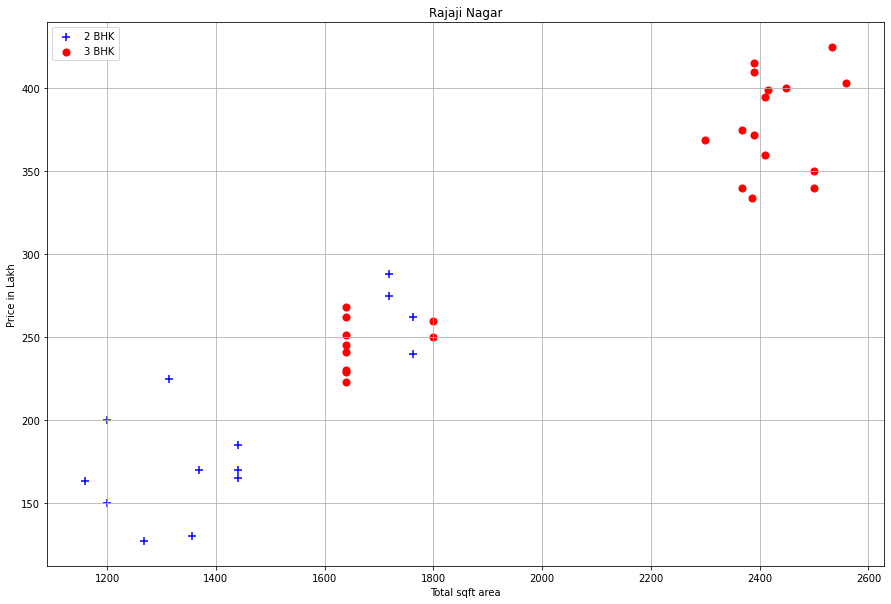

In [68]:
scatter_plot(df3,'Rajaji Nagar')

In [69]:
## Number of properties in a particular range of Price_per_sqft

Text(0, 0.5, 'Count')

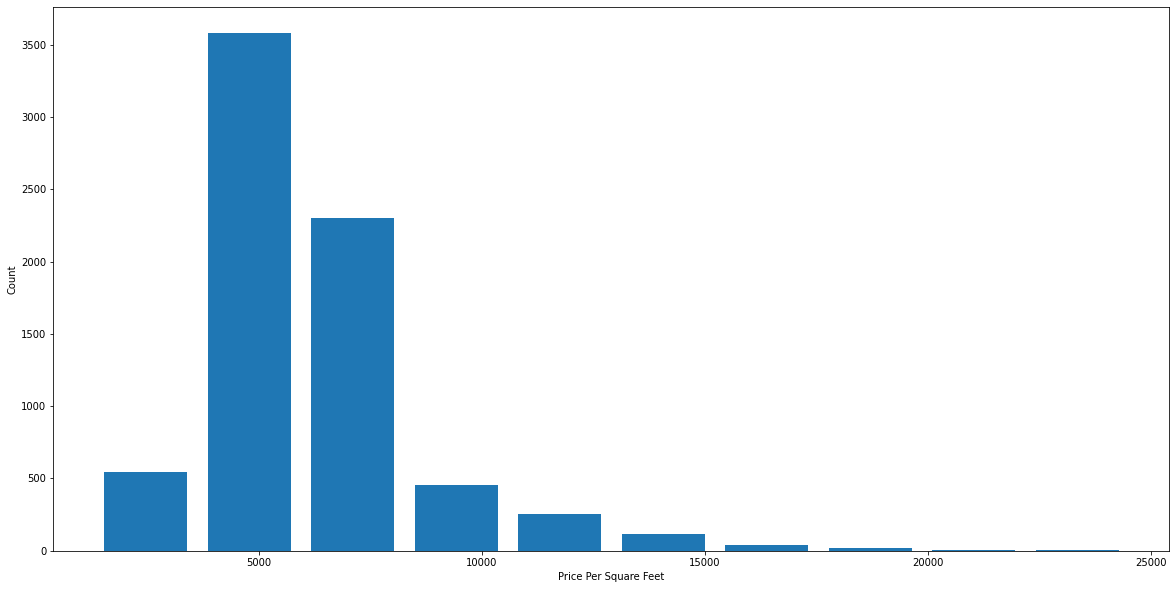

In [70]:
plt.figure(figsize=(20,10))
plt.hist(df3.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [71]:
### Exploring the bathroom feature

df3.columns

Index(['location', 'no_of_bhk', 'total_sqft', 'bath', 'price',
       'Price_per_sqft'],
      dtype='object')

In [72]:
df3.bath.value_counts()

2.0     4188
3.0     1763
1.0      568
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

In [73]:
df3.head()

,location,no_of_bhk,total_sqft,bath,price,Price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [74]:
df3[df3.bath==8]

,location,no_of_bhk,total_sqft,bath,price,Price_per_sqft
36,2nd Stage Nagarbhavi,6,3000.0,8.0,451.0,15033.333333
37,2nd Stage Nagarbhavi,6,2400.0,8.0,450.0,18750.000000
293,Abbigere,8,3000.0,8.0,150.0,5000.000000
1296,Bommanahalli,8,3000.0,8.0,140.0,4666.666667
3028,Hennur Road,8,5000.0,8.0,250.0,5000.000000
3245,Horamavu Banaswadi,6,3800.0,8.0,200.0,5263.157895
3517,Indira Nagar,8,3250.0,8.0,600.0,18461.538462
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429
5513,R.T. Nagar,9,3600.0,8.0,165.0,4583.333333
5611,Raja Rajeshwari Nagar,8,4800.0,8.0,225.0,4687.500000


Text(0, 0.5, 'Count')

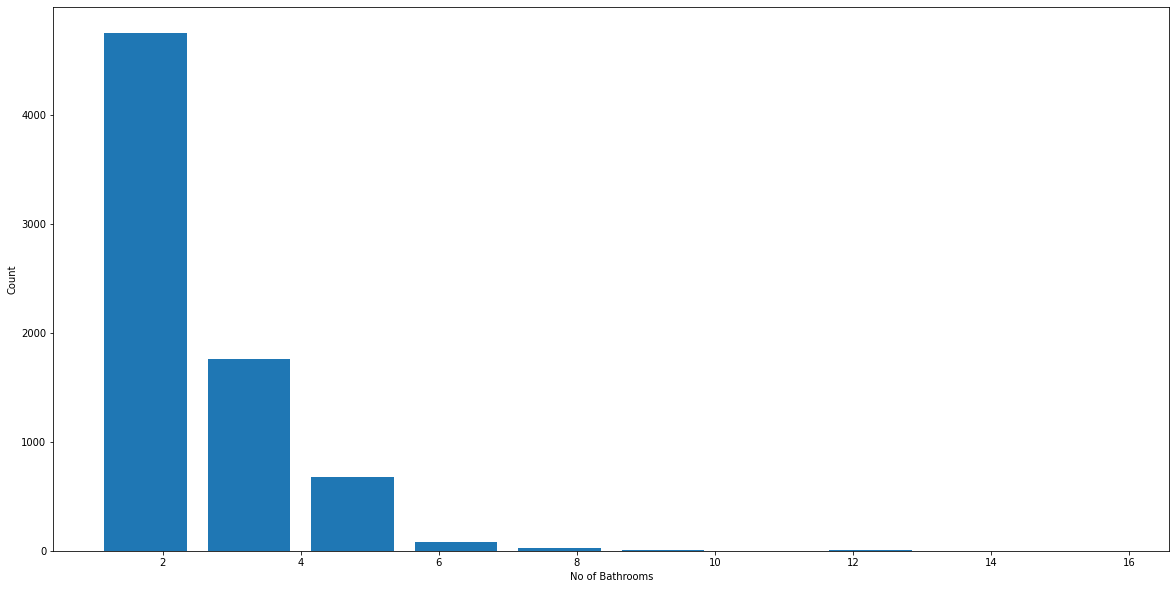

In [75]:
plt.figure(figsize=(20,10))
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")

In [76]:
### house having bathrooms more than rooms is unusual so we drop such

df4= df3[df3.bath < df3.no_of_bhk +2]
df4.shape

(7239, 6)

In [77]:
df4.bath.value_counts()

2.0     4188
3.0     1763
1.0      568
4.0      499
5.0      155
6.0       38
7.0       10
8.0        9
9.0        6
16.0       1
12.0       1
13.0       1
Name: bath, dtype: int64

In [78]:
## We also drop the houses having many bathrooms, as they show anamolous behaviour
ind= df4[(df4.bath > 10)].index.values
ind

array([8572, 9306, 9637], dtype=int64)

In [79]:
df4=df4.drop(ind,axis='index')

In [80]:
df4.shape

(7236, 6)

In [81]:
df4.columns

Index(['location', 'no_of_bhk', 'total_sqft', 'bath', 'price',
       'Price_per_sqft'],
      dtype='object')

In [82]:
### Now we just drop the unecessary columns

df5=df4.drop('Price_per_sqft',axis=1)
df5

,location,no_of_bhk,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0
...,...,...,...,...,...
10233,other,2,1200.0,2.0,70.0
10234,other,1,1800.0,1.0,200.0
10237,other,2,1353.0,2.0,110.0
10238,other,1,812.0,1.0,26.0


### Bulding Machine Learning Model

In [83]:
## We neeed to convert the categorical data of location column into numeric we use dummies
dummies=pd.get_dummies(df5.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df6=pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6

,location,no_of_bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,2,1200.0,2.0,70.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1,1800.0,1.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,2,1353.0,2.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,1,812.0,1.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df7=df6.drop('location',axis='columns')
df7

,no_of_bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X=df7.drop('price',axis='columns')
y=df7.price

In [87]:
X.head()

,no_of_bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [90]:
y_train.head()

2964    125.0
5651    195.0
5712     50.0
5248     70.0
5150     73.5
Name: price, dtype: float64

In [91]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

model_LR.fit(x_train,y_train)


LinearRegression()

In [92]:
model_LR.predict(x_test)

array([ 44.30160434,  44.28596509, 156.89587049, ..., 129.96043934,
        39.33363536,  66.41810976])

In [93]:
model_LR.score(x_test,y_test)

0.8900214614960543